In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

# Data Visualizations with Seaborn

Code from: https://www.kaggle.com/masumrumi/a-statistical-analysis-ml-workflow-of-titanic was used to write the code below

In [45]:
df = pd.read_csv('../data/titanic3.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


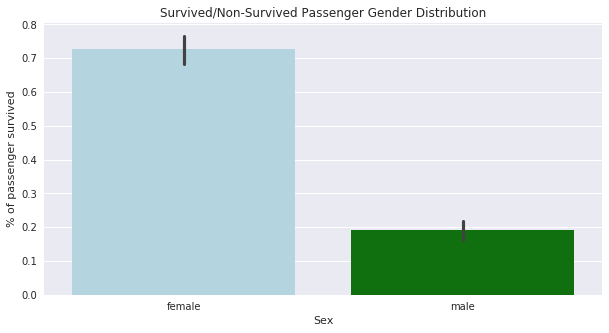

In [26]:
pal = {'male':'seagreen', 'female':'lightblue'}

plt.subplots(figsize = (10,5))
ax = sns.barplot(x = "sex", 
            y = "survived", 
            data=df, 
            palette = pal,
            linewidth=2 )
plt.title("Survived/Non-Survived Passenger Gender Distribution")
plt.ylabel("% of passenger survived")
plt.xlabel("Sex")

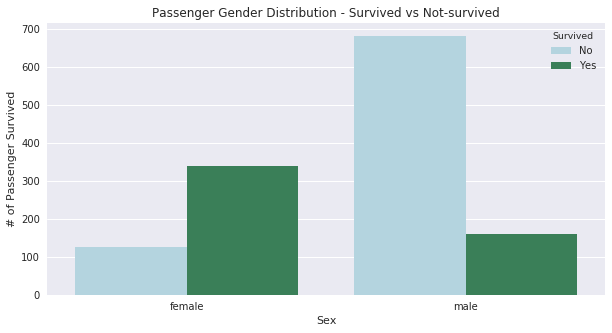

In [38]:
pal = {1:'seagreen', 0:'lightblue'}
sns.set(style='darkgrid')
plt.subplots(figsize = (10,5))
ax = sns.countplot(x = 'sex', 
                   hue='survived',
                   data = df, 
                   linewidth=2, 
                   palette = pal
)

## Fixing title, xlabel and ylabel
plt.title("Passenger Gender Distribution - Survived vs Not-survived")
plt.xlabel("Sex");
plt.ylabel("# of Passenger Survived")

## Fixing xticks
#labels = ['Female', 'Male']
#plt.xticks(sorted(train.Sex.unique()), labels)

## Fixing legends
leg = ax.get_legend()
leg.set_title("Survived")
legs = leg.texts
legs[0].set_text("No")
legs[1].set_text("Yes")
plt.show()

([<matplotlib.axis.XTick at 0x7fda70cd6b70>,
 <a list of 3 Text xticklabel objects>)

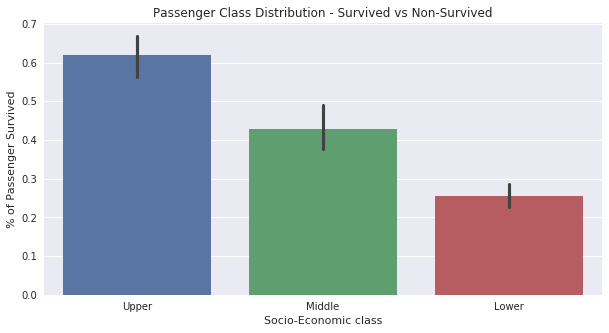

In [37]:
plt.subplots(figsize = (10,5))
sns.barplot(x = "pclass", 
            y = "survived", 
            data=df, 
            linewidth=2)
plt.title("Passenger Class Distribution - Survived vs Non-Survived")
plt.xlabel("Socio-Economic class")
plt.ylabel("% of Passenger Survived")
labels = ['Upper', 'Middle', 'Lower']
#val = sorted(train.Pclass.unique())
val = [0,1,2] ## this is just a temporary trick to get the label right. 
plt.xticks(val, labels)

/opt/anaconda3/envs/jh/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/opt/anaconda3/envs/jh/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


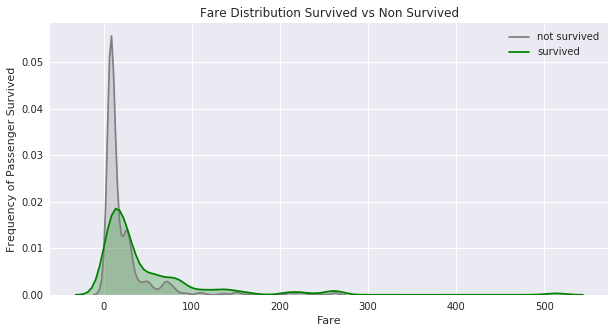

In [43]:
fig = plt.figure(figsize=(10,5),)
ax=sns.kdeplot(df.loc[(df['survived'] == 0),'fare'] , color='gray',shade=True,label='not survived')
ax=sns.kdeplot(df.loc[(df['survived'] == 1),'fare'] , color='g',shade=True, label='survived')
plt.title('Fare Distribution Survived vs Non Survived')
plt.ylabel("Frequency of Passenger Survived")
plt.xlabel("Fare")
plt.show()

/opt/anaconda3/envs/jh/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/opt/anaconda3/envs/jh/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


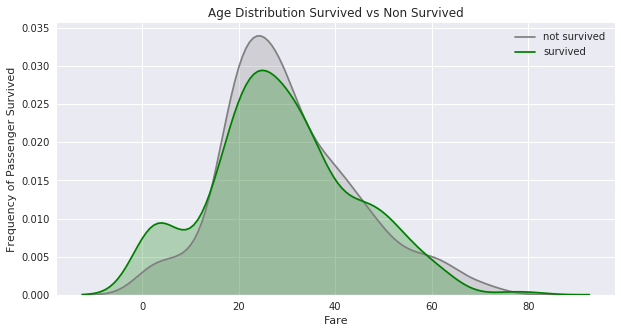

In [49]:
fig = plt.figure(figsize=(10,5),)
ax=sns.kdeplot(df.loc[(df['survived'] == 0),'age'] , color='gray',shade=True,label='not survived')
ax=sns.kdeplot(df.loc[(df['survived'] == 1),'age'] , color='g',shade=True, label='survived')
plt.title('Age Distribution Survived vs Non Survived')
plt.ylabel("Frequency of Passenger Survived")
plt.xlabel("Fare")
plt.show()

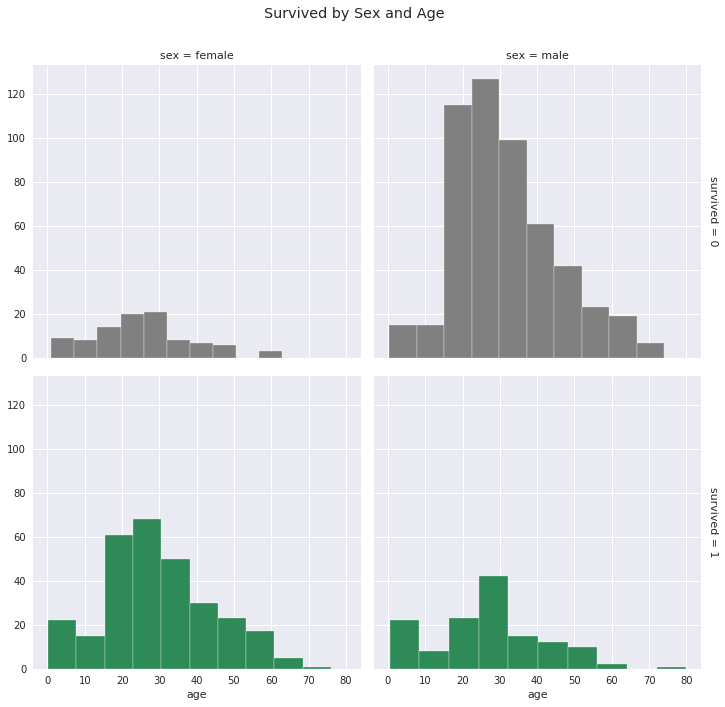

In [52]:
pal = {1:"seagreen", 0:"gray"}
g = sns.FacetGrid(df,size=5, col="sex", row="survived", margin_titles=True, hue = "survived",
                  palette=pal)
g = g.map(plt.hist, "age", edgecolor = 'white');
g.fig.suptitle("Survived by Sex and Age")
plt.subplots_adjust(top=0.90)

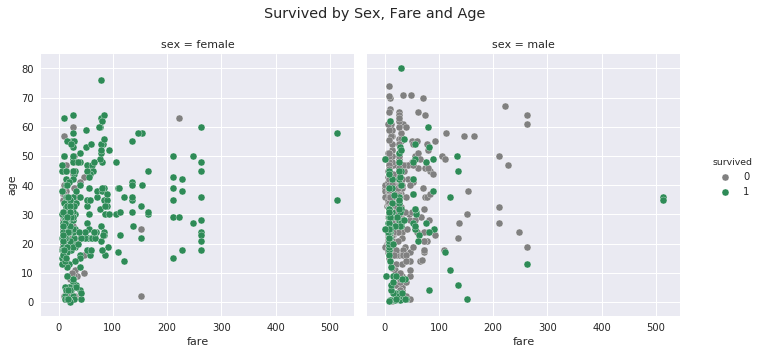

In [55]:
g = sns.FacetGrid(df, size=5,hue="survived", col ="sex", margin_titles=True,
                palette=pal,)
g.map(plt.scatter, "fare", "age",edgecolor="w").add_legend()
g.fig.suptitle("Survived by Sex, Fare and Age")
plt.subplots_adjust(top=0.85)

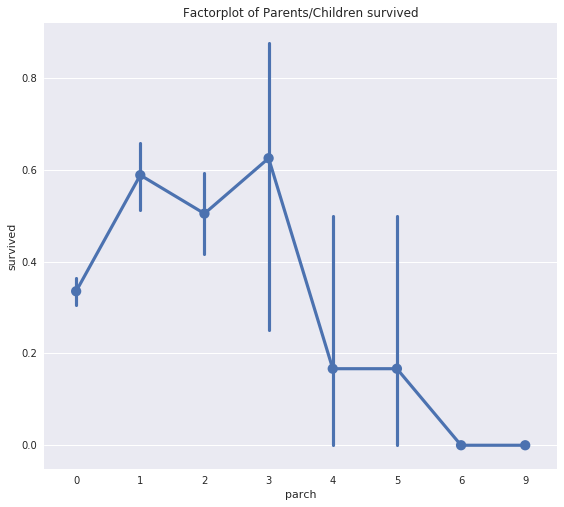

In [58]:
sns.factorplot(x = "parch", y = "survived", data = df,kind = "point",size = 8)
plt.title("Factorplot of Parents/Children survived")
plt.subplots_adjust(top=0.85)

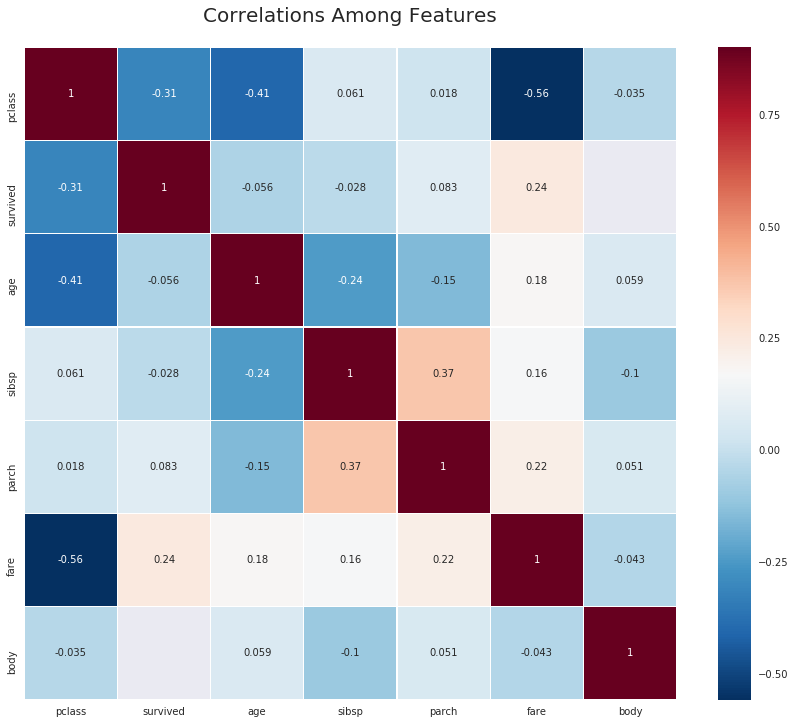

In [61]:
## heatmeap to see the correlation between features. 
# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df.corr(), dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize = (15,12))
sns.heatmap(df.corr(), 
            annot=True,
            #mask = mask,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = .9,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20);